<a href="https://colab.research.google.com/github/ramisa7/Team_EEG/blob/main/Milestone1_Data_Science_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Initial Data Analysis



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:

train_path = r"train.csv"
train_data = pd.read_csv(train_path)
train_data

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106795,351917269,6,12.0,2147388374,6,12.0,4195677307,10351,LRDA,0,0,0,3,0,0
106796,351917269,7,14.0,2147388374,7,14.0,290896675,10351,LRDA,0,0,0,3,0,0
106797,351917269,8,16.0,2147388374,8,16.0,461435451,10351,LRDA,0,0,0,3,0,0
106798,351917269,9,18.0,2147388374,9,18.0,3786213131,10351,LRDA,0,0,0,3,0,0


In [5]:
print('Train shape:', train_data.shape )

Train shape: (106800, 15)


In [24]:
targets = train_data.columns[-6:]
print('Targets', list(targets))

Targets ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']


In [25]:
# Summary statistics for numerical columns in train.csv
print("\nSummary Statistics - Training Data:")
print(train_data.describe())


Summary Statistics - Training Data:
             eeg_id     eeg_sub_id  eeg_label_offset_seconds  spectrogram_id  \
count  1.068000e+05  106800.000000             106800.000000    1.068000e+05   
mean   2.104387e+09      26.286189                118.817228    1.067262e+09   
std    1.233371e+09      69.757658                314.557803    6.291475e+08   
min    5.686570e+05       0.000000                  0.000000    3.537330e+05   
25%    1.026896e+09       1.000000                  6.000000    5.238626e+08   
50%    2.071326e+09       5.000000                 26.000000    1.057904e+09   
75%    3.172787e+09      16.000000                 82.000000    1.623195e+09   
max    4.294958e+09     742.000000               3372.000000    2.147388e+09   

       spectrogram_sub_id  spectrogram_label_offset_seconds      label_id  \
count       106800.000000                     106800.000000  1.068000e+05   
mean            43.733596                        520.431404  2.141415e+09   
std        

In [26]:
#count missing values
missing_values = train_data.isnull().sum()
missing_values


eeg_id                              0
eeg_sub_id                          0
eeg_label_offset_seconds            0
spectrogram_id                      0
spectrogram_sub_id                  0
spectrogram_label_offset_seconds    0
label_id                            0
patient_id                          0
expert_consensus                    0
seizure_vote                        0
lpd_vote                            0
gpd_vote                            0
lrda_vote                           0
grda_vote                           0
other_vote                          0
dtype: int64

In [27]:
duplicate_rows = train_data[train_data.duplicated()].shape

There is no missing/duplicate data.  

In [28]:
# Distribution of classes in train.csv
class_distribution = train_data[targets].sum()

# convert vote to probability
train_data[targets] /= train_data[targets].sum(axis=1).values[:, None]
train_data

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,1.0,0.0,0.0,0.0,0.0,0.0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,1.0,0.0,0.0,0.0,0.0,0.0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,1.0,0.0,0.0,0.0,0.0,0.0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,1.0,0.0,0.0,0.0,0.0,0.0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106795,351917269,6,12.0,2147388374,6,12.0,4195677307,10351,LRDA,0.0,0.0,0.0,1.0,0.0,0.0
106796,351917269,7,14.0,2147388374,7,14.0,290896675,10351,LRDA,0.0,0.0,0.0,1.0,0.0,0.0
106797,351917269,8,16.0,2147388374,8,16.0,461435451,10351,LRDA,0.0,0.0,0.0,1.0,0.0,0.0
106798,351917269,9,18.0,2147388374,9,18.0,3786213131,10351,LRDA,0.0,0.0,0.0,1.0,0.0,0.0


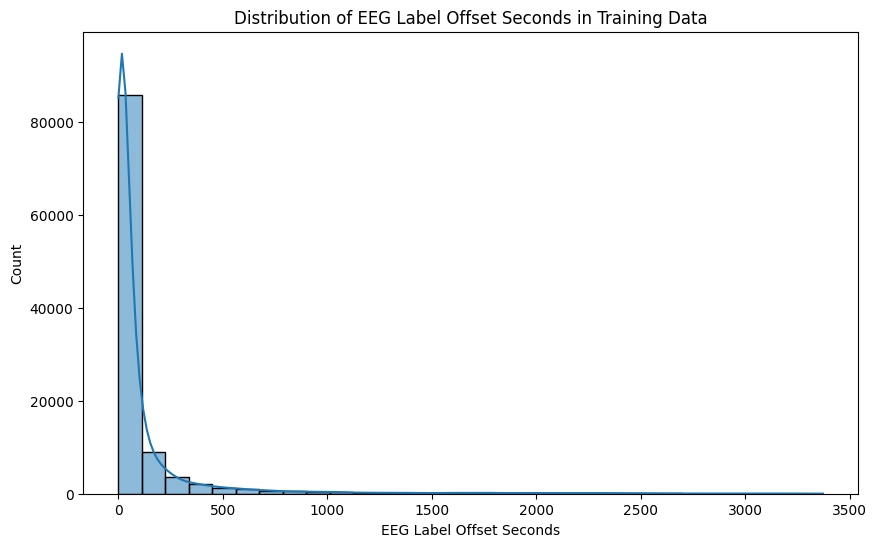

In [31]:
# Visualize distribution of eeg_label_offset_seconds in train.csv
plt.figure(figsize=(10, 6))
sns.histplot(train_data['eeg_label_offset_seconds'], bins=30, kde=True)
plt.title('Distribution of EEG Label Offset Seconds in Training Data')
plt.xlabel('EEG Label Offset Seconds')
plt.ylabel('Count')
plt.show()

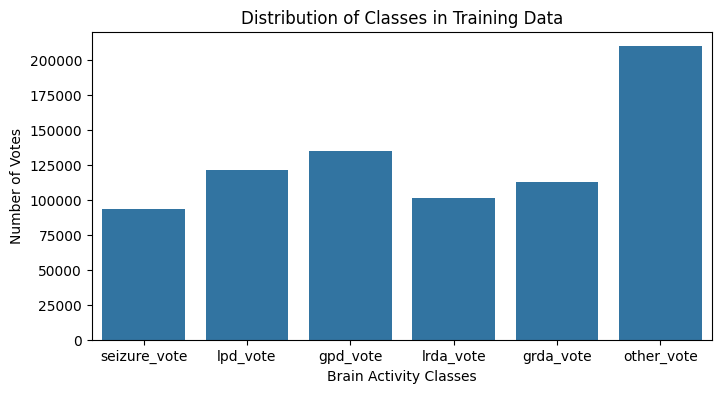

In [32]:
# Plot the distribution of classes
plt.figure(figsize=(8, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Distribution of Classes in Training Data')
plt.xlabel('Brain Activity Classes')
plt.ylabel('Number of Votes')
plt.show()

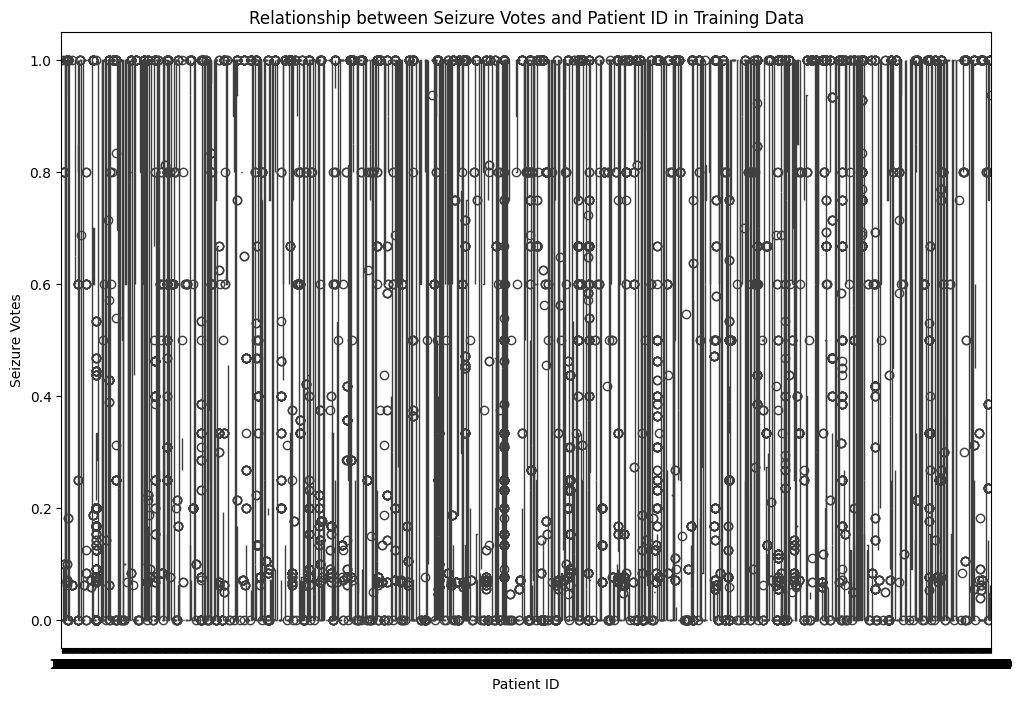

In [33]:
# Relationship between classes and patient_id in train.csv
plt.figure(figsize=(12, 8))
sns.boxplot(x='patient_id', y='seizure_vote', data=train_data)
plt.title('Relationship between Seizure Votes and Patient ID in Training Data')
plt.xlabel('Patient ID')
plt.ylabel('Seizure Votes')
plt.show()

In [34]:
!pip install pyarrow



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\ramis\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


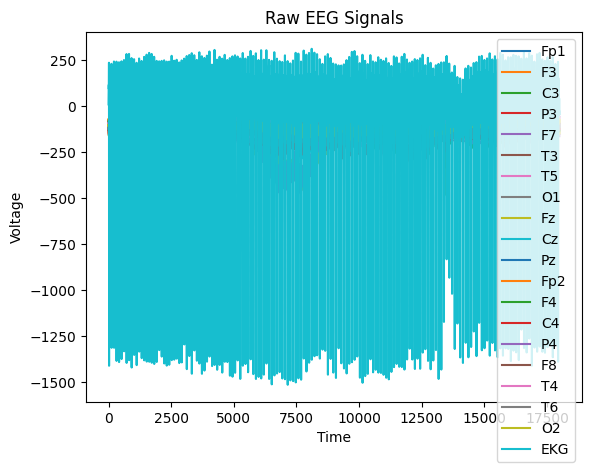

Raw data visualization successful.


In [35]:
import os  # Import the os module for file path manipulation

# raw data visualization:
eeg_id = 1628180742
subsample_id = 0

# Construct the file path
base_dir = "train_eegs"  # Specify the base directory
eeg_filename = os.path.join(base_dir, f"{eeg_id}.parquet")  

try:
    raw_eeg_data = pd.read_parquet(eeg_filename)
    # Plot each electrode channel
    for column in raw_eeg_data.columns:
        plt.plot(raw_eeg_data[column], label=column)

    # Set plot title and labels
    plt.title("Raw EEG Signals")
    plt.xlabel("Time")
    plt.ylabel("Voltage")
    plt.legend()
    plt.show()

    print("Raw data visualization successful.")
except FileNotFoundError:
    print(f"File {eeg_filename} not found.")
except Exception as e:
    print(f"An error occurred: {e}")


In [36]:
# Select only numeric columns for correlation
# numeric_columns = train_data.select_dtypes(include=['number'])

# # Plot the correlation heatmap
# plt.figure(figsize=(12, 8))
# sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', linewidths=.5)
# plt.title('Correlation Heatmap - Training Data')
# plt.show()


# 2. Literature Review

-

Applying Classification Algorithms to Identify Brain Activity Patterns

https://link.springer.com/chapter/10.1007/978-3-030-78811-7_42#Sec2


This study investigates the use of classification algorithms on EEG data to detect eye state patterns. Key areas explored include feature selection, preprocessing techniques, algorithm comparison, and real-time application. Using Weka, 20 algorithms were tested on "EEG Motor Movement/Imagery" data, with IBk, RandomForest, and RandomTree performing best. Further tests confirmed IBk's consistency. Simple preprocessing methods yielded accuracies of 73%–93%. This highlights machine learning's potential in diverse EEG applications beyond medical diagnostics.



- EEG-Inception: An Accurate and Robust End-toEnd Neural Network for EEG-based Motor Imagery
Classification

https://arxiv.org/abs/2101.10932

This paper presents a novel convolutional neural network (CNN) architecture called EEG-Inception for precise and robust classification of EEG-based motor imagery (MI) in brain-computer interface (BCI) research. EEG-Inception, based on the Inception-Time network, achieves high accuracy without complex signal preprocessing. A unique data augmentation method enhances accuracy by at least 3% and reduces overfitting with limited datasets. The model surpasses state-of-the-art methods, achieving 88.4% and 88.6% accuracy on BCI Competition IV 2a and 2b datasets, respectively, with rapid processing suitable for real-time applications. Notably, it demonstrates low classification standard deviation, indicating robustness across subjects. Results suggest EEG-Inception's potential as a subject-independent classifier for EEG-based MI tasks.

- Classification for EEG Signals Using Machine Learning Algorithm

https://link.springer.com/chapter/10.1007/978-3-031-48774-3_24

This paper explores the classification of EEG signals using machine learning algorithms, specifically Random Forest (RF) and Support Vector Machine (SVM). The study evaluates their performance on a publicly available dataset from the Bonn University EEG database. Feature extraction is conducted through decomposed sub bands of shearlet transform, generating parameters like the Grey Level Co-occurrence Matrix (GLCM). Feature selection is employed to enhance classification accuracy. Without feature selection, SVM and RF classifiers achieved accuracies of 90.3% and 91.2%, respectively. However, with feature selection, accuracy improved to 92.7% for SVM and 93.5% for RF. This underscores the effectiveness of feature selection in improving EEG signal classification accuracy.



# 3. Future Plan

- Merge EGG tables, synchronize the spectrum and EGG tables with the train.csv file

- Normalize data and do Feature Extraction using correlation matrix.

- Generate visualizations post-extraction.